In [82]:

import math

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator, Aer

from qiskit.visualization import plot_histogram, plot_bloch_multivector
from shor_algo_adder_method import *

from Backend.backend import Backend
from Backend.fake_backend import FakeBackend
from Result.result import ResultData

from SaveData.save_data_to_file import CSVWriter
from itertools import permutations

from counts_plot_helpers import *


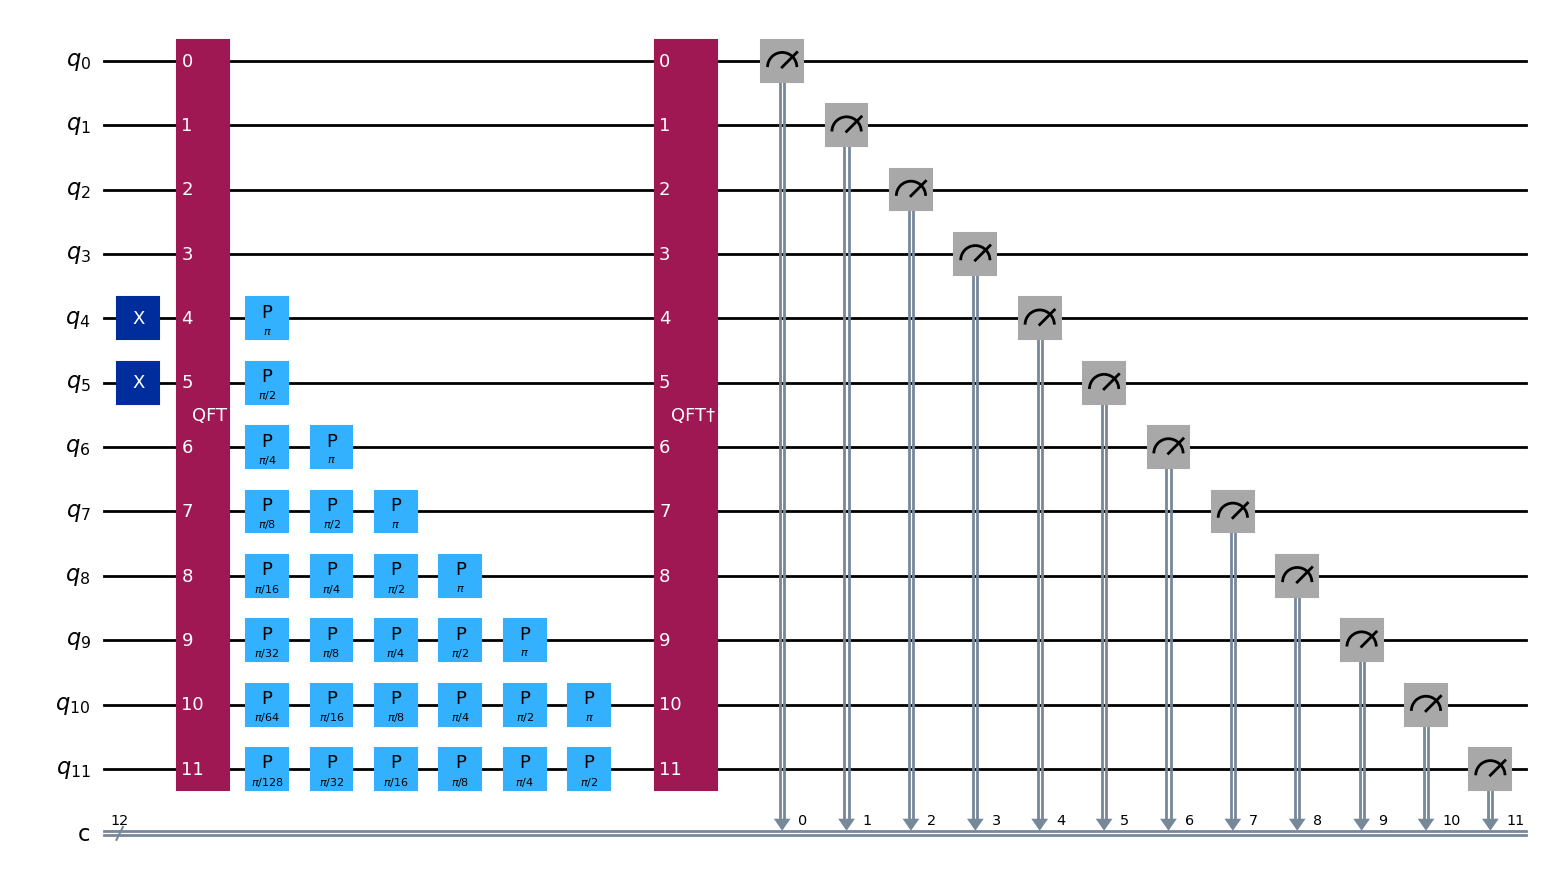

In [59]:
b = 48
a = 2000
n = 12

q = QuantumRegister(n, 'q')
c = ClassicalRegister(n, 'c')
classic_a = QuantumCircuit(q, c)

set_start_state(classic_a, b, 0)

classic_a.append(qft(n, False), range(n))
classic_a = classic_a.compose(adder_classic_a(n, a, kind="fixed"), range(n))
# classic_a.append(adder_classic_a(n, a, kind="fixed"), range(n))
classic_a.append(qft_dagger(n, False), range(n))

classic_a.measure(range(n), range(n))

classic_a.draw('mpl')

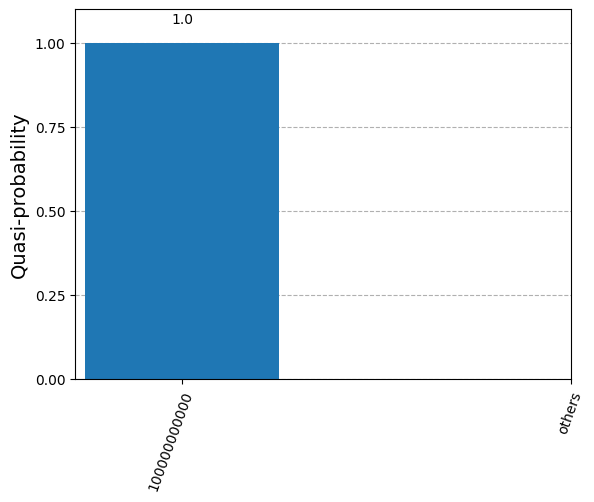

In [81]:
aer_sim = Aer.get_backend("aer_simulator")
t_adder = transpile(classic_a, aer_sim)

counts_adder = aer_sim.run(t_adder).result().get_counts()

norm = norm_counts(counts_adder)
add_zero_values(norm, n)
compine_less_then(norm, 0.1)
plot_histogram(norm)

In [37]:
layoutlist = list(permutations(range(n), n))
print(layoutlist)

[(0, 1, 2, 3), (0, 1, 3, 2), (0, 2, 1, 3), (0, 2, 3, 1), (0, 3, 1, 2), (0, 3, 2, 1), (1, 0, 2, 3), (1, 0, 3, 2), (1, 2, 0, 3), (1, 2, 3, 0), (1, 3, 0, 2), (1, 3, 2, 0), (2, 0, 1, 3), (2, 0, 3, 1), (2, 1, 0, 3), (2, 1, 3, 0), (2, 3, 0, 1), (2, 3, 1, 0), (3, 0, 1, 2), (3, 0, 2, 1), (3, 1, 0, 2), (3, 1, 2, 0), (3, 2, 0, 1), (3, 2, 1, 0)]


In [63]:
backend = Backend()

In [64]:

transpile_list = []
for opt_lvl in [0, 3]:
    for layout in [None]:
        transpile_list.append(
            backend.transpile_save_param(qc=classic_a, optimization_level=opt_lvl, initial_layout=layout, seed_transpiler=42, 
                                                 input_a = a, input_b = b, input_qubit_num = n))

In [65]:
qc_resultData = []
for qc_tr in transpile_list:
    qc_res  = qc_tr.backend.run(qc_tr.transpiled_qc, shots=1024, seed_simulator=42)
    result = ResultData(qc_res)  
    qc_resultData.append(result)

In [66]:
excel_name = f"add_{a}_plus_{b}_aer.csv"

save = CSVWriter(file_name=excel_name)

data = []
for qc_transpile, res_data in zip(transpile_list, qc_resultData):
    data.append([qc_transpile, res_data])  

save.save_data(data)

Data saved to ..\logs\add_2000_plus_48_aer_2024_09_05_21_34_13.csv
